## Import packages

In [6]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from ultralytics.utils.plotting import Colors
from PIL import Image

Custom color palette

In [2]:
custom_palette = {
    0:  (0, 0, 0),        # black
    1:  (255, 0, 0),      # blue
    2:  (42, 42, 165),    # brown
    3:  (55, 175, 212),   # gold
    4:  (0, 255, 0),      # green
    5:  (128, 128, 128),  # grey
    6:  (0, 165, 255),    # orange
    7:  (0, 0, 255),      # red
    8:  (192, 192, 192),  # silver
    9:  (230, 0, 255),    # violet
    10: (255, 255, 255),  # white
    11: (0, 255, 255)     # yellow
}

# Override the default palette
colors = Colors()
colors.palette = custom_palette  # Replace with your custom colors

Load the model.

In [3]:
best_model = YOLO('train_yolov8n/weights/best.pt')

Load an Image.

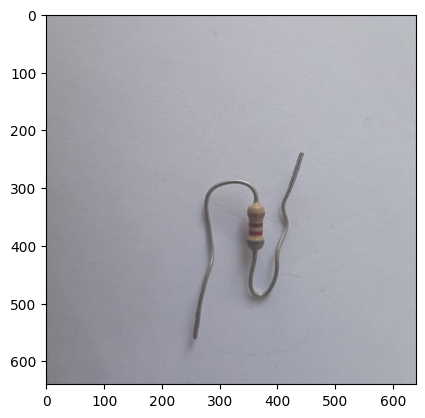

In [14]:
img_name = 'resistor value training.v8i.yolov8/test/images/820R_1-4W_-89-_jpg.rf.e77e0ae0d4e055e2f42090570d8e946a.jpg'
#img_name = 'test_img/test_5.jpg'

img = np.asarray(Image.open(img_name))
imgplot = plt.imshow(img)

Inference an image.


image 1/1 d:\git\ITMO\ML\ML_3\resistor value training.v8i.yolov8\test\images\820R_1-4W_-89-_jpg.rf.e77e0ae0d4e055e2f42090570d8e946a.jpg: 640x640 1 brown, 2 golds, 2 greys, 1 red, 175.2ms
Speed: 6.2ms preprocess, 175.2ms inference, 15.2ms postprocess per image at shape (1, 3, 640, 640)


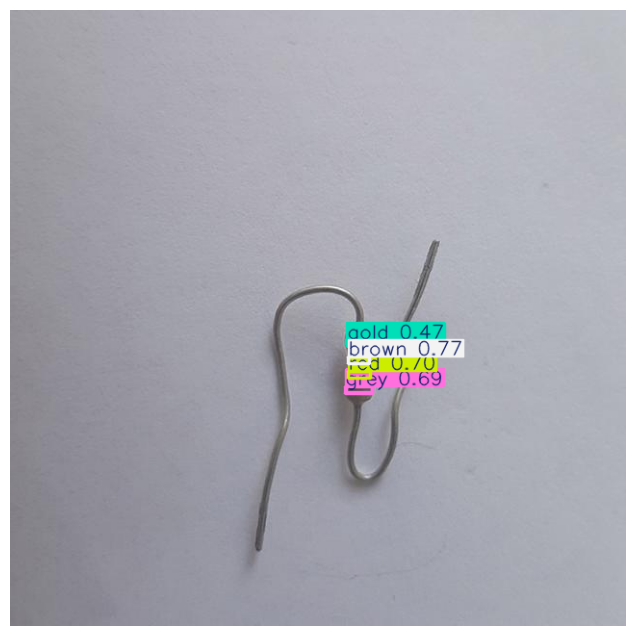

In [ ]:

results = best_model(img_name)

im_array = results[0].plot(line_width=2)  # plot detection results

im = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)  # BGR to RGB
plt.figure(figsize=(12, 8))
plt.imshow(im)
plt.axis('off')
plt.savefig('plots/result_2.png')
plt.show()

Conference levels.

In [15]:
# Получаем имена классов
names = best_model.names  # словарь {id: name}

for i, result in enumerate(results):

    boxes = result.boxes

    # Извлекаем данные
    class_ids = boxes.cls.int().cpu().tolist()        # ID классов
    confidences = boxes.conf.cpu().tolist()           # Confidence (уверенность)
    classNames = [names[id] for id in class_ids]      # Названия классов

    # Выводим пары "класс - уверенность"
    for name, conf in zip(classNames, confidences):
        print(f"{name:<10} | Confidence: {conf:.2f}")

brown      | Confidence: 0.77
red        | Confidence: 0.70
grey       | Confidence: 0.69
gold       | Confidence: 0.47
gold       | Confidence: 0.31
grey       | Confidence: 0.29
